In [13]:
#Import libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
#Data Preparation
data = pd.read_csv('dataframe.csv')
X = data.drop('feature_0', axis=1)  # Features
X=X.drop('Unnamed: 0',axis=1)
y = data['feature_0']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape)
print(y.shape)
print("Training set shape:", X_train.shape)
print("Testing set shape:", y_train.shape)
print(data.head())

(610, 70)
(610,)
Training set shape: (488, 70)
Testing set shape: (488,)
   Unnamed: 0  feature_0  feature_1  feature_2  feature_3  feature_4  \
0           0          1        0.0        0.0        1.0        0.0   
1           1          0        0.0        0.0        1.0        0.0   
2           2          1        0.0        0.0        1.0        0.0   
3           3          1        0.0        0.0        1.0        0.0   
4           4          0        0.0        0.0        1.0        0.0   

   feature_5  feature_6  feature_7  feature_8  ...  feature_61  feature_62  \
0        0.0        1.0        0.0        1.0  ...         1.0         0.0   
1        0.0        1.0        0.0        1.0  ...         1.0         0.0   
2        0.0        1.0        0.0        1.0  ...         1.0         0.0   
3        0.0        1.0        0.0        1.0  ...         1.0         0.0   
4        0.0        1.0        0.0        1.0  ...         1.0         0.0   

   feature_63  feature_64

In [42]:
#Optimization technique (GridSearchCV and KerasClassifier)
#Utilized the below GridSearchCV to find optimal layer values and lr
#used additional technicque from https://www.youtube.com/watch?v=lV0weESA0Sc&ab_channel=DigitalSreeni to assist this method
def create_model(learning_rate, neurons_per_layer):
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(neurons_per_layer/2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer=optimizers.Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=0)

param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01],
    'neurons_per_layer': [32, 64, 128],
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classificat

C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Best: 0.536822 using {'learning_rate': 0.01, 'neurons_per_layer': 64}


In [43]:
#Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')#sigmoid in output layer for binary classification 
])

In [44]:
#Training the Recommendation System
learning_rate=0.01
model.compile(optimizer=optimizers.Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64)
model.summary()

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 0.7189 - accuracy: 0.4948
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5327
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5599
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5840
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6279
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.5937
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.6068
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.5887
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.6306
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6318
Model: "sequential_245"
_______________

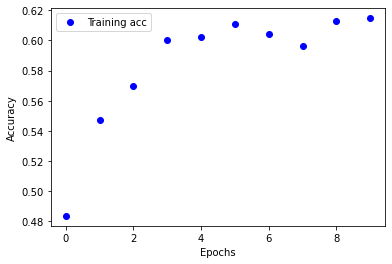

In [45]:
%matplotlib inline

acc = history.history['accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.53      0.60      0.56        62
           1       0.52      0.45      0.48        60

    accuracy                           0.52       122
   macro avg       0.52      0.52      0.52       122
weighted avg       0.52      0.52      0.52       122



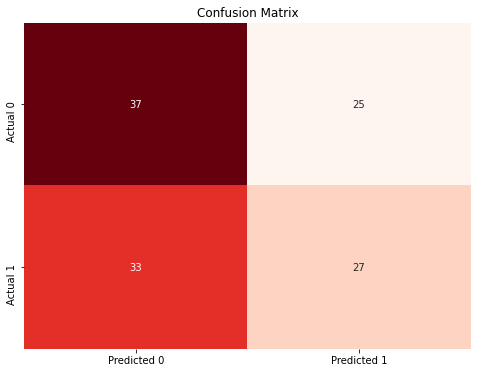

Accuracy: 52.46%


In [46]:
#Evaluation
y_pred=model.predict_classes(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [67]:
#Random Data Comparison

random_dataset = np.random.randint(0, 2, size=(610,71))
new_data = pd.DataFrame(random_dataset)

X1 = new_data.drop(new_data.columns[0], axis=1)
y1 = new_data[0]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X1.shape)
print(y1.shape)
print(new_data.shape)
print("Training set shape:", X_train1.shape)
print("Testing set shape:", y_train1.shape)
print(new_data.head())

(610, 70)
(610,)
(610, 71)
Training set shape: (488, 70)
Testing set shape: (488,)
   0   1   2   3   4   5   6   7   8   9   ...  61  62  63  64  65  66  67  \
0   0   1   1   0   0   1   1   1   1   1  ...   0   0   1   1   0   1   1   
1   1   0   0   1   0   1   1   0   0   0  ...   1   1   1   1   0   0   0   
2   1   0   0   1   0   1   0   0   1   0  ...   0   1   1   1   0   1   0   
3   0   1   1   0   1   0   0   1   0   1  ...   0   0   1   1   0   0   0   
4   0   1   0   0   0   1   1   0   1   0  ...   0   0   0   1   0   0   0   

   68  69  70  
0   0   1   1  
1   0   1   1  
2   1   0   1  
3   0   1   1  
4   0   1   1  

[5 rows x 71 columns]


In [68]:
model_new = Sequential([
    Dense(64, activation='relu', input_shape=(X_train1.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [69]:
learning_rate=0.01
model_new.compile(optimizer=optimizers.Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
history1 = model_new.fit(X_train1, y_train1, epochs=10, batch_size=64)
model_new.summary()

Epoch 1/10
8/8 [==============================] - 1s 1ms/step - loss: 0.7037 - accuracy: 0.5850
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5199
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6642
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.6286
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.6715
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7412
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.7228
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7551
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7847
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8277
Model: "sequential_250"
_______________

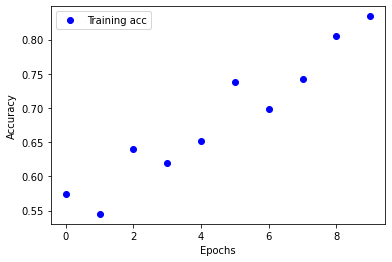

In [70]:
%matplotlib inline

acc = history1.history['accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.44      0.55      0.49        58
           1       0.47      0.36      0.41        64

    accuracy                           0.45       122
   macro avg       0.45      0.46      0.45       122
weighted avg       0.45      0.45      0.45       122



C:\Users\Soorya Suresh\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


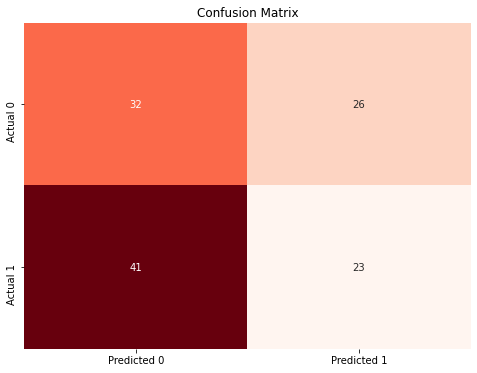

Accuracy: 45.08%
Model: "sequential_250"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_750 (Dense)            (None, 64)                4544      
_________________________________________________________________
dense_751 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_752 (Dense)            (None, 1)                 33        
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________


In [71]:
y_pred_new=model_new.predict_classes(X_test1)
print(classification_report(y_test1,y_pred_new))
cm = confusion_matrix(y_test1, y_pred_new)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test1, y_pred_new)
print(f"Accuracy: {accuracy * 100:.2f}%")
model_new.summary()

From comparing the performance metrics obtained from training the real data vs. random data is that the random data returned lower accuracy scores. This is probably because the real data must have patterns and more of a trend compared to a randomly generated data. Refer to the report for more analysis.